<a href="https://colab.research.google.com/github/ramansandhu17/Airbnb_Analysis/blob/main/revenue_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

import matplotlib.pyplot as plt

revenue_df=pd.read_csv("NRSairbnb_bookings.csv")
revenue_df['Date']=pd.to_datetime(revenue_df['Date'])

revenue_df['Year']=revenue_df['Date'].dt.year
revenue_df['Month']=revenue_df['Date'].dt.month


#lets get the revenue for the night to accumulate revenue for the property for the whole month
#sum up the revenue for month
revenue_trend=revenue_df.groupby(["PropertyID","Year","Month"]).apply(lambda x:(x["PricePerNight"]*x["Occupancy"]).sum()).reset_index(name="TotalRevenue")
print(revenue_trend.head())

  PropertyID  Year  Month  TotalRevenue
0       P001  2024      8          3639
1       P001  2024      9          3824
2       P001  2024     10          3741
3       P001  2024     11          3944
4       P001  2024     12          4351


<ipython-input-2-021208d15e9f>:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  revenue_trend=revenue_df.groupby(["PropertyID","Year","Month"]).apply(lambda x:(x["PricePerNight"]*x["Occupancy"]).sum()).reset_index(name="TotalRevenue")


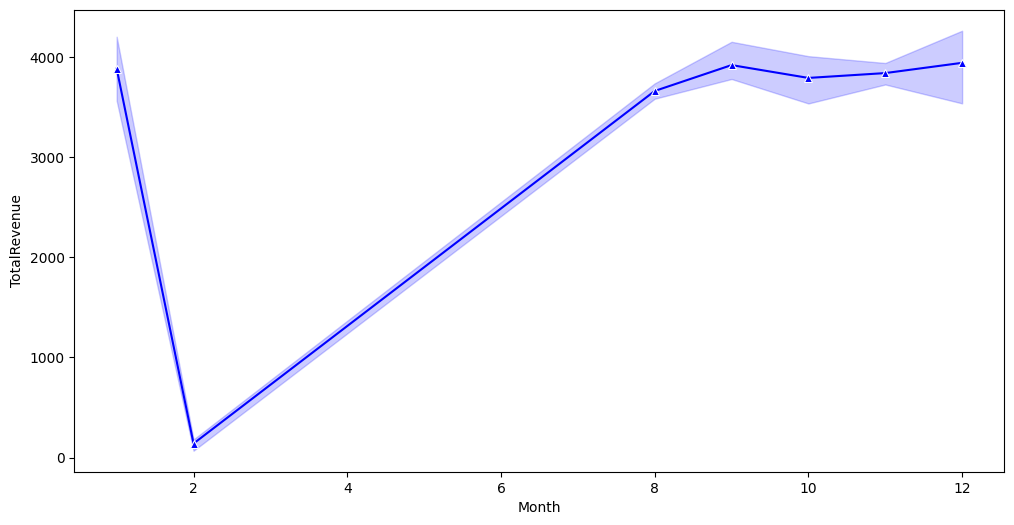

In [5]:
import seaborn as sns

plt.figure(figsize=(12,6))
sns.lineplot(data=revenue_trend,x="Month",y="TotalRevenue",marker="^",color='b')

plt.show()

Observations: Revenue growth increasing from March to August ( please note we only have data from August onwards). Will be able to get more details by adding propertyid

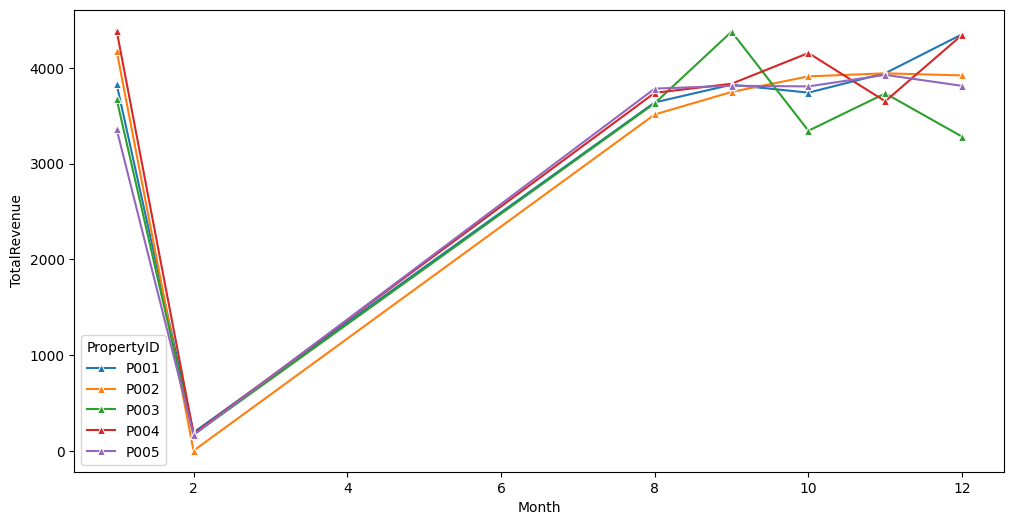

In [6]:
import seaborn as sns

plt.figure(figsize=(12,6))
sns.lineplot(data=revenue_trend,x="Month",y="TotalRevenue",hue="PropertyID",marker="^",color='b')

plt.show()

Observations: Property 3 is a bit outlier here,